In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from src.dm import DataModule

dm1 = DataModule(batch_size=2, false_color=True, t=[4,5,6])
dm2 = DataModule(batch_size=2, false_color=True, t=[4,5,6], train_trans={
    'HorizontalFlip': {'p': 0.5},
	'VerticalFlip': {'p': 0.5},
	'RandomRotate90': {'p': 0.5},
	'Transpose': {'p': 0.5},
    }, input_size=(512, 512))

dm1.setup(), dm2.setup()

(None, None)

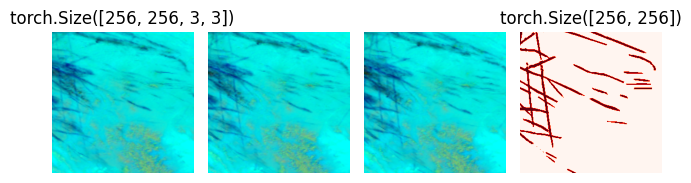

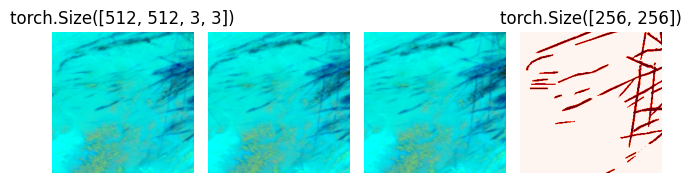

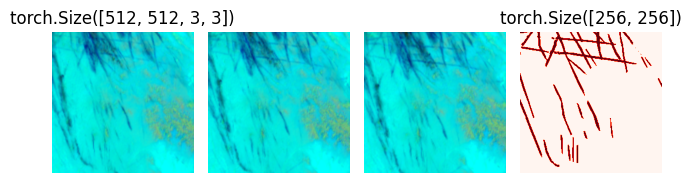

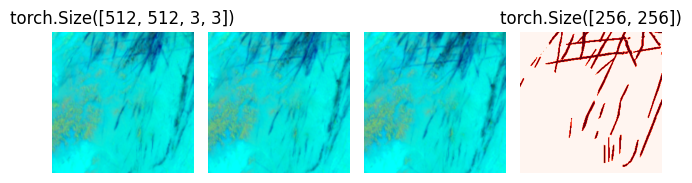

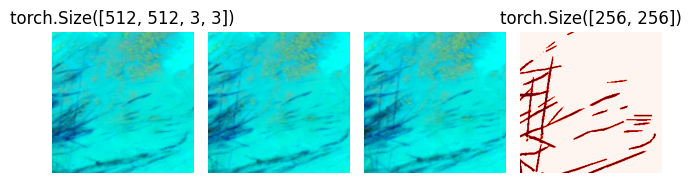

In [42]:
import matplotlib.pyplot as plt
import numpy as np 
from skimage.transform import resize


samples = 5
ix = 1
for i in range(samples):
    if i == 0:
        images, masks = next(iter(dm1.train_dataloader(shuffle=False)))
    else:
        images, masks = next(iter(dm2.train_dataloader(shuffle=False)))

    fig = plt.figure()
    ax = fig.add_subplot(1, 4, 1)
    ax.imshow(images[ix][...,0,:3])
    ax.axis('off')
    ax.set_title(images[ix].shape)
    ax = fig.add_subplot(1, 4, 2)
    ax.imshow(images[ix][...,1,:3])
    ax.axis('off')
    ax = fig.add_subplot(1, 4, 3)
    ax.imshow(images[ix][...,2,:3])
    ax.axis('off')
    ax = fig.add_subplot(1, 4, 4)
    ax.imshow(masks[ix], cmap='Reds')
    ax.axis('off')
    ax.set_title(masks[ix].shape)
    plt.tight_layout()
    plt.show()